# mini_project_2.ipynb

Group Members: Peter Bollhorn

This notebook presents my solution to Mini Project 2.

Tobias Thormod Birk Nielsen and I have discussed our mini projects 2 together.


In [1]:
import sys
sys.path.append("..")

import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
from reader import generic_reader
from plotter import histogram_plotter

## Task 1
First I load the Excel files into separate pandas data frames called `red_wine` and `white_wine`.

In [2]:
red_wine = generic_reader.read_excel_file_to_data_frame("wine-data/winequality-red.xlsx", skiprows=1)
white_wine = generic_reader.read_excel_file_to_data_frame("wine-data/winequality-white.xlsx", skiprows=1)

Next, I have a look at the two data frames. I see that they have identical column headers, and that there is 1599 rows in `red_wine` and 4898 rows in `white_wine`.

In [3]:
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Task 2
I check that there are no missing values in the two data frames, which there is not.

In [5]:
print(red_wine.isna().sum())
print("\n")
print(white_wine.isnull().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Then I check that all values are numeric in the two data frames, which they are:

In [6]:
print(red_wine.map(np.isreal).all())
print("\n")
print(white_wine.map(np.isreal).all())

fixed acidity           True
volatile acidity        True
citric acid             True
residual sugar          True
chlorides               True
free sulfur dioxide     True
total sulfur dioxide    True
density                 True
pH                      True
sulphates               True
alcohol                 True
quality                 True
dtype: bool


fixed acidity           True
volatile acidity        True
citric acid             True
residual sugar          True
chlorides               True
free sulfur dioxide     True
total sulfur dioxide    True
density                 True
pH                      True
sulphates               True
alcohol                 True
quality                 True
dtype: bool


## Task 3
I add a "type" column to the two data frames with value either "red" or "white".

Then I concatenate the two data frames into a single data frame called `wine`.

In [7]:
red_wine.insert(0, "type", "red")
white_wine.insert(0, "type", "white")
wine = pd.concat([red_wine, white_wine], ignore_index=True)
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
6493,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
6494,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
6495,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


## Task 4
I have searched the web and found this journal article:
- Cortez et al. (2009) "Modeling wine preferences by data mining from physicochemical properties". Decision Support Systems, Volume 47, Issue 4, Pages 547-553. DOI: 10.1016/j.dss.2009.05.016

The article is available as Open Access here: https://findit.dtu.dk/en/catalog/539b649abb9401d5220228fd

And its dataset is available here: https://archive.ics.uci.edu/dataset/186/wine+quality

This article is interesting, because it works with the exact same dataset as this mini project.

The article and its dataset are included in this repo in the folder "cortez_et_al_2009".

## Task 5

(Cortez et al., 2009) explains that the dataset consists of 1599 red and 4898 white vinho verde samples from Portugal.

From the article I now know what the contents of the columns are:

| Column name          | Variable type            | Description                                         |
|----------------------|----------------------|-----------------------------------------------------|
| type                 | Categorical          | "red" or "white"                                    |
| fixed acidity        | Continuous number    | [g<sub>(tartaric acid)</sub>/dm<sup>3</sup>]        |
| volatile acidity     | Continuous number    | [g<sub>(acetic acid)</sub>/dm<sup>3</sup>]          |
| citric acid          | Continuous number    | [g/dm<sup>3</sup>]                                  |
| residual sugar       | Continuous number    | [g/dm<sup>3</sup>]                                  |
| chlorides            | Continuous number    | [g<sub>(sodium chloride)</sub>/dm<sup>3</sup>]      |
| free sulfur dioxide  | Continuous number    | [mg/dm<sup>3</sup>]                                 |
| total sulfur dioxide | Continuous number    | [mg/dm<sup>3</sup>]                                 |
| density              | Continuous number    | [g/cm<sup>3</sup>]                                  |
| pH                   | Continuous number    | [-]                                                 |
| sulphates            | Continuous number    | [g<sub>(potassium sulphate)</sub>/dm<sup>3</sup>]   |
| alcohol              | Continuous number    | [% vol.]                                            |
| quality              | Discrete number      | from 0 to 10                                        |

The 11 variables which are continuous numbers are all machine measured in physicochemical tests.

The quality is based on blind tests by a minimum of three human wine experts.
Each expert graded the wine quality between 0 (very bad) and 10 (excellent).
The median value is used as the final quality score for the wine sample.


**Independent variables**: I identify the type and the 11 physicochemical properties as the independent variables (the input).

**Dependent variable**: I identify the quality as assessed by the human wine experts as the dependent variable (the output).


## Task 6
Right now I choose to not transform the data, and continue working with the original data.

## Task 7
Here is the descriptive statistics of the numerical data in `red_wine`, `white_wine` and `wine`.

In [8]:
red_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [9]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [10]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Now I plot histograms for `red_wine` to see if the data is normally distributed:
- Volatile acidity, density and pH are approximately normally distributed.
- Fixed acidity, residual sugar, chlorides, total sulfur dioxide, sulphates and alcohol are positively skewed (right skewed)

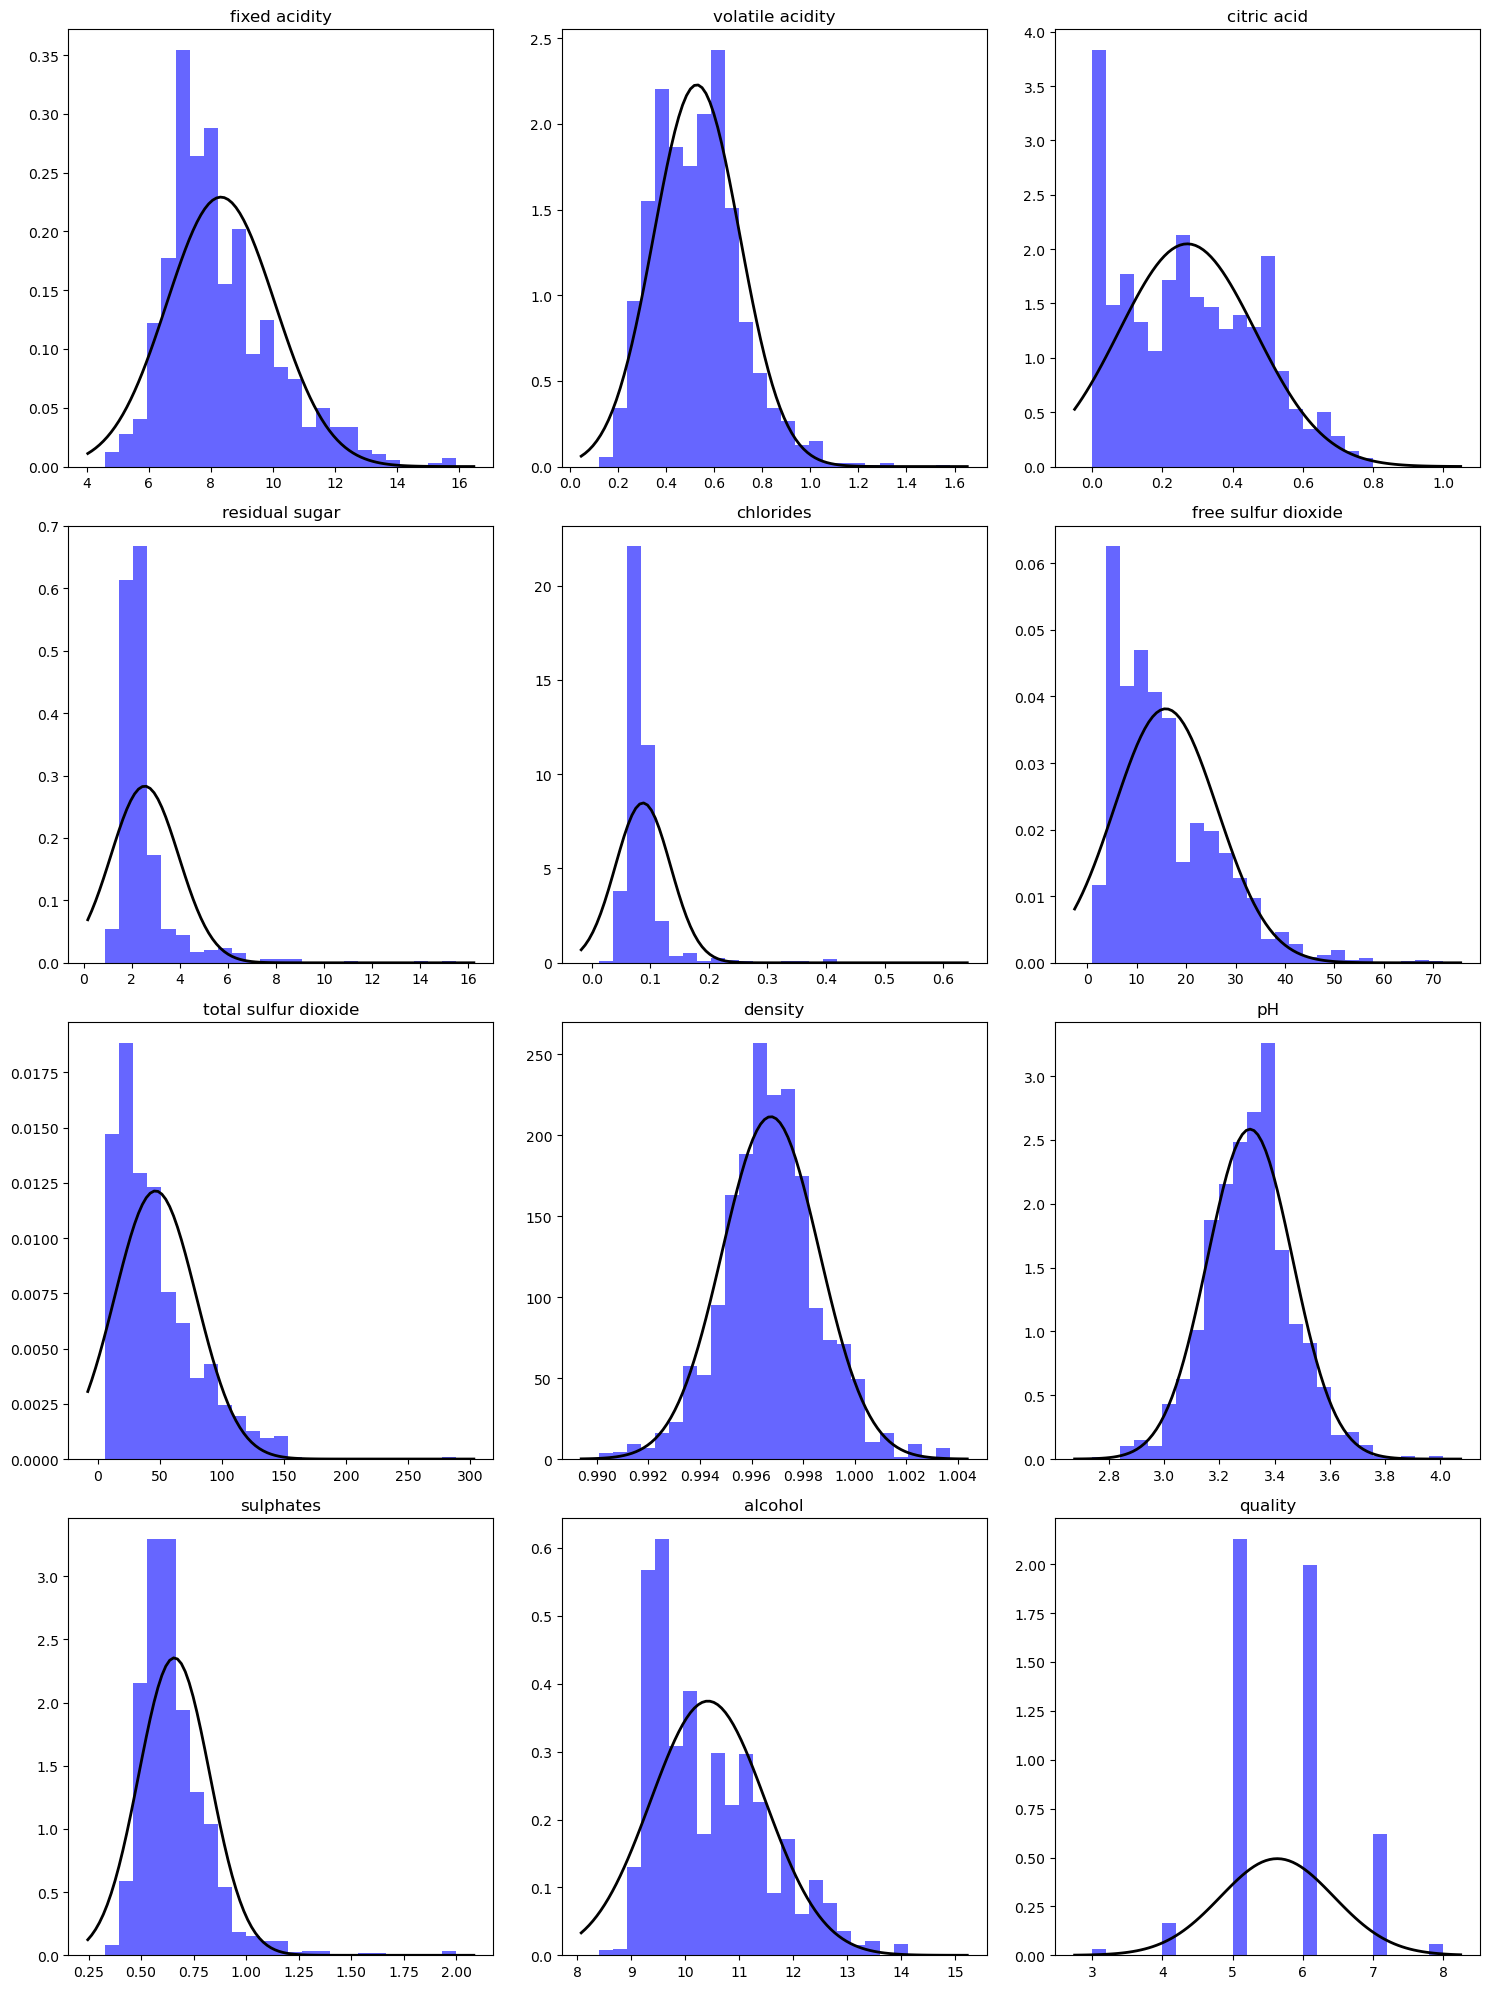

In [11]:
histogram_plotter.plot_histograms_for_data_frame(red_wine)

Now I also plot histograms for `white_wine`.

Compared to red wine, many of the variables for white wine are more normally distributed.

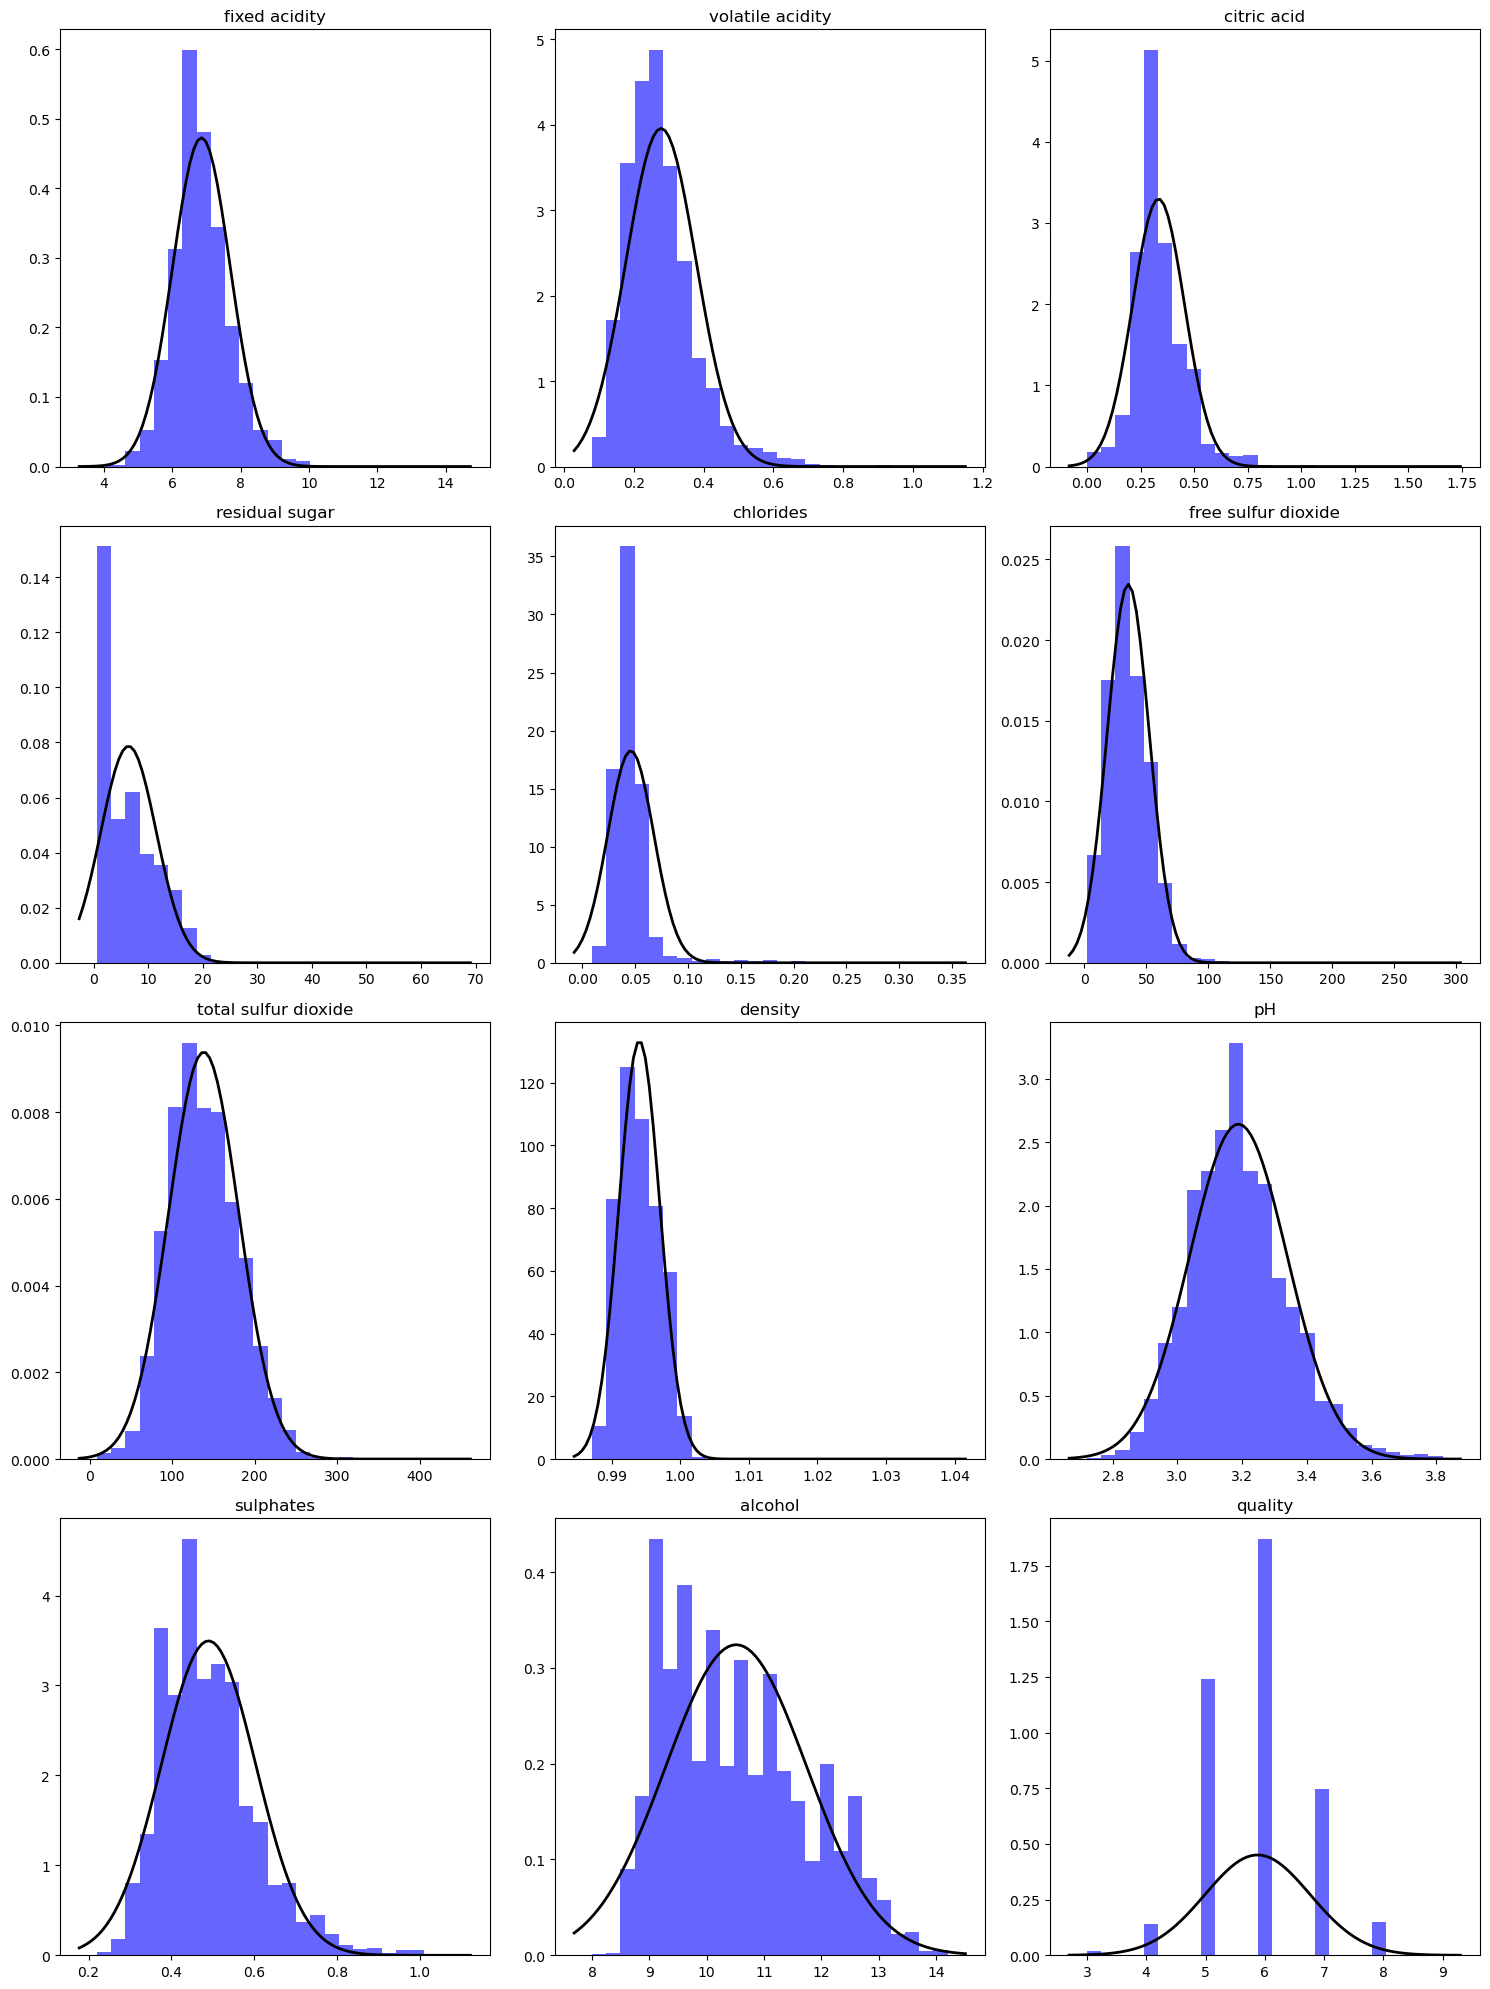

In [12]:
histogram_plotter.plot_histograms_for_data_frame(white_wine)

## Task 8

**Quality:**

Now I explore the quality of the red wine and white wine.

I see that for both types of wine most samples have a quality of 5 or 6.

I see that the white wine has a bit higher average quality (5.88) than red wine (5.64).

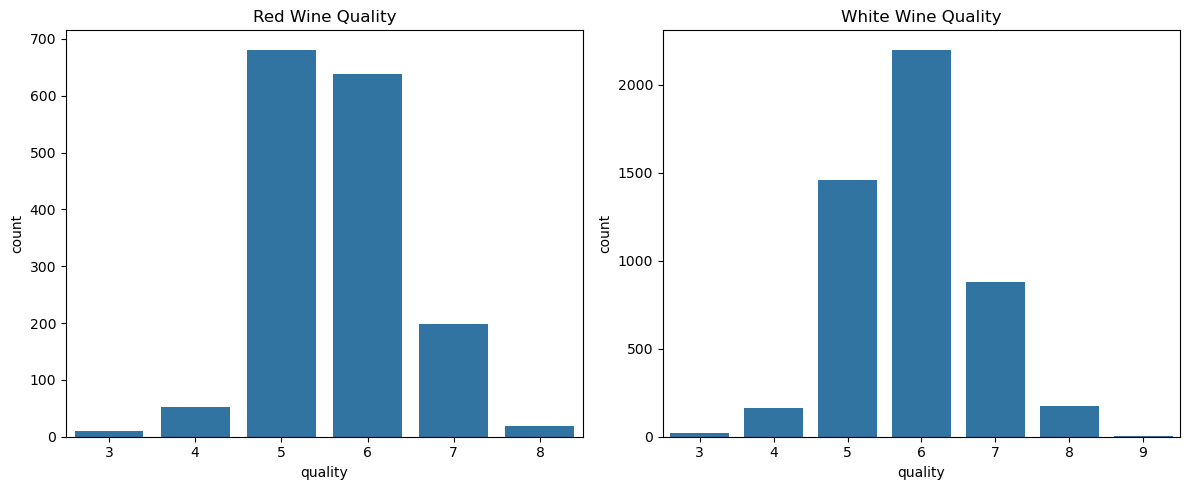

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sb.countplot(x='quality', data=red_wine, ax=axes[0])
axes[0].set_title('Red Wine Quality')

sb.countplot(x='quality', data=white_wine, ax=axes[1])
axes[1].set_title('White Wine Quality')

plt.tight_layout()

In [14]:
red_wine_average_quality = red_wine['quality'].mean()
red_wine_average_quality

np.float64(5.6360225140712945)

In [15]:
white_wine_average_quality = white_wine['quality'].mean()
white_wine_average_quality

np.float64(5.87790935075541)

**Alcohol:**

Now I explore the alcohol content of the two types of wine.

I see that for red wine many samples have an alcohol content of approx. 9.5%, whereas for white wine the alchol content is more uniformly distributed.

The average alcohol content is almost the same, as it is 10.4% for red wine and 10.5% for white wine.

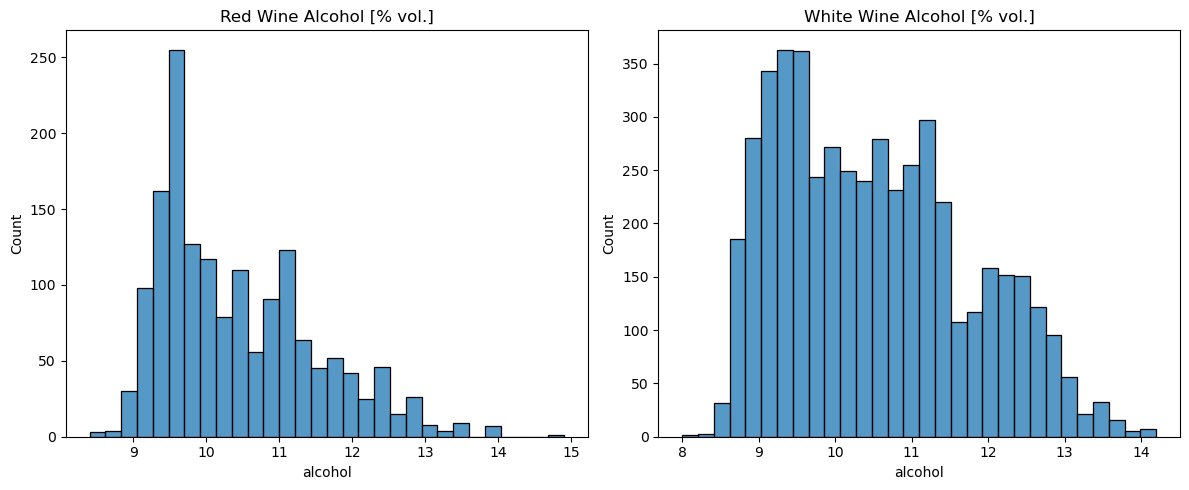

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sb.histplot(x='alcohol', data=red_wine, ax=axes[0], bins=30)
axes[0].set_title('Red Wine Alcohol [% vol.]')

sb.histplot(x='alcohol', data=white_wine, ax=axes[1], bins=30)
axes[1].set_title('White Wine Alcohol [% vol.]')

plt.tight_layout()

In [17]:
red_wine_average_alcohol = red_wine['alcohol'].mean()
red_wine_average_alcohol

np.float64(10.422983114446529)

In [18]:
white_wine_average_alcohol = white_wine['alcohol'].mean()
white_wine_average_alcohol

np.float64(10.514267047774602)

**Residual sugar:**

Now I explore the residual sugar of the two types of wine.

I see that the average residual sugar content is significantly higher for white wine (6.4 g/dm³) than for red wine (2.5 g/dm³).

This suggests that, in general, white wines are sweeter than red wines.

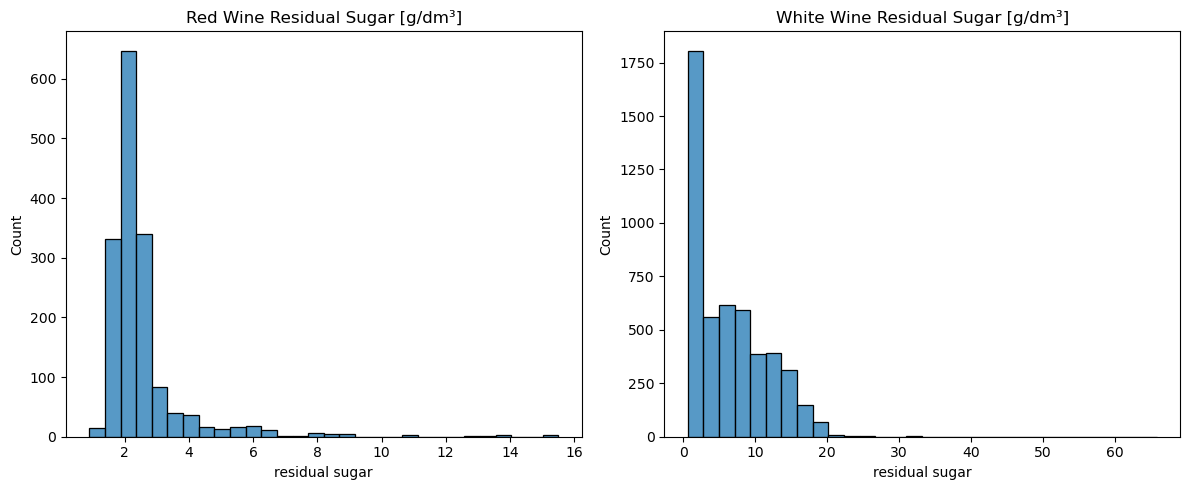

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sb.histplot(x='residual sugar', data=red_wine, ax=axes[0], bins=30)
axes[0].set_title('Red Wine Residual Sugar [g/dm³]')

sb.histplot(x='residual sugar', data=white_wine, ax=axes[1], bins=30)
axes[1].set_title('White Wine Residual Sugar [g/dm³]')

plt.tight_layout()

In [20]:
red_wine_average_residual_sugar = red_wine['residual sugar'].mean()
red_wine_average_residual_sugar

np.float64(2.53880550343965)

In [21]:
white_wine_average_residual_sugar = white_wine['residual sugar'].mean()
white_wine_average_residual_sugar

np.float64(6.391414863209474)

## Task 10

I split the `wine` data frame into 5 subsets by binning pH.

In [22]:
wine['pH_bin'] = pd.cut(wine['pH'], bins=5)
wine

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,pH_bin
0,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,"(3.494, 3.752]"
1,red,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,"(2.978, 3.236]"
2,red,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,"(3.236, 3.494]"
3,red,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,"(2.978, 3.236]"
4,red,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,"(3.494, 3.752]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,white,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,"(3.236, 3.494]"
6493,white,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,"(2.978, 3.236]"
6494,white,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,"(2.978, 3.236]"
6495,white,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,"(3.236, 3.494]"


I see that all the densities are slightly smaller than the density for water (1 g/cm³).

I see that the pH bin "(3.494, 3.752]" has the highest density.

In [23]:
average_density_per_bin = wine.groupby('pH_bin', observed=False)['density'].mean()
average_density_per_bin

pH_bin
(2.719, 2.978]    0.994801
(2.978, 3.236]    0.994679
(3.236, 3.494]    0.994688
(3.494, 3.752]    0.994887
(3.752, 4.01]     0.993582
Name: density, dtype: float64

I now do the same, but for 10 pH bins.

I see that the bin "(3.365, 3.494]" has the highest average density.

In [24]:
wine['pH_bin'] = pd.cut(wine['pH'], bins=10)
average_density_per_bin = wine.groupby('pH_bin', observed=False)['density'].mean()
average_density_per_bin

pH_bin
(2.719, 2.849]    0.993112
(2.849, 2.978]    0.994882
(2.978, 3.107]    0.994706
(3.107, 3.236]    0.994664
(3.236, 3.365]    0.994515
(3.365, 3.494]    0.995044
(3.494, 3.623]    0.994942
(3.623, 3.752]    0.994640
(3.752, 3.881]    0.993888
(3.881, 4.01]     0.992665
Name: density, dtype: float64

## Task 11
I create the correlation matrix for `red_wine` and display it as a heat map, in order to search for correlations between the variables.

I see that the most correlated variables are fixed acidity and pH with a R-value of -0.68

<Axes: >

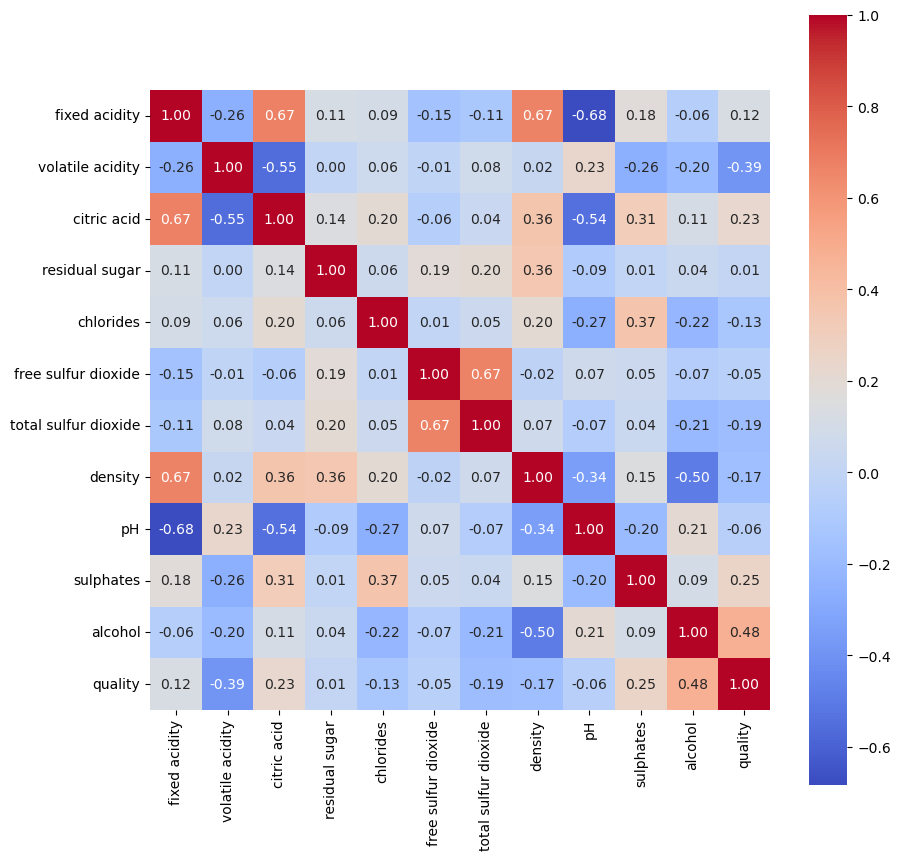

In [25]:
red_wine_correlation_matrix = red_wine.drop(columns=['type']).corr()
plt.figure(figsize=(10, 10))
sb.heatmap(red_wine_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)


Now I create the correlation matrix for `white_wine` and also displays that as a heat map.

I see that the R-values are different for white wine than for red wine.

For white wine the most correlated variables are residual sugar and density with a R-value of 0.84

<Axes: >

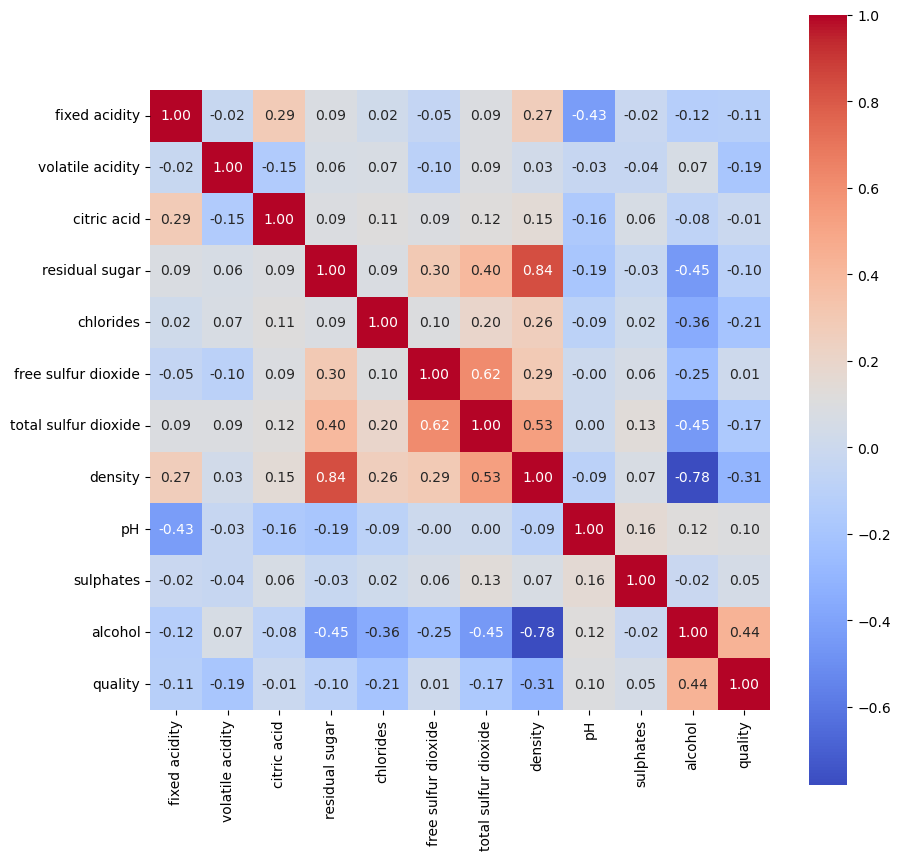

In [26]:
white_wine_correlation_matrix = white_wine.drop(columns=['type']).corr()
plt.figure(figsize=(10, 10))
sb.heatmap(white_wine_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

I make a scatter plot of residual sugar and density for white wine, in order to explore the relationship further.

<Axes: xlabel='residual sugar', ylabel='density'>

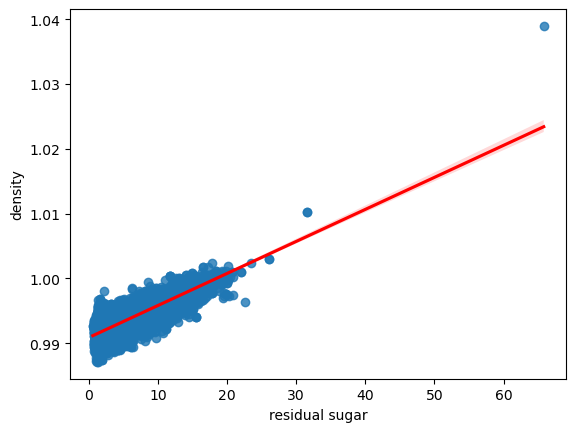

In [27]:
sb.regplot(x='residual sugar', y='density', data=white_wine, line_kws={'color': 'red'})

In the scatter plot I have also drawn the regression line.

I now calculate the equation for the regression line, and confirm that it has R=0.84.

In [28]:
# Extract x and y
x = white_wine['residual sugar']
y = white_wine['density']

# Perform linear regression
slope, intercept, r_value, _, _ = linregress(x, y)

# Print equation and R-value
print(f"Regression line: y = {slope:.4f}x + {intercept:.4f}")
print(f"R-value: {r_value:.4f}")

Regression line: y = 0.0005x + 0.9909
R-value: 0.8390


## Task 12

In the scatter plot I have just plotted I can see some outliers in terms of residual sugar.

I now make a box-whiskers plot for residual sugar for white wine, in order to explore these outliers further.

<Axes: >

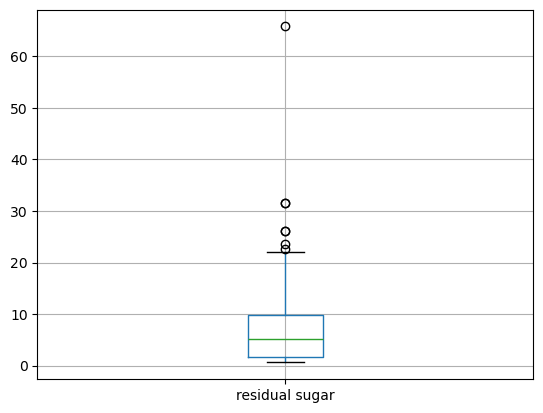

In [29]:
white_wine.boxplot(column='residual sugar')

I can see that only 7 white wine samples have a residual sugar value greater than 22 g/dm³ (the upper whisker endpoint).

In [30]:
white_wine.sort_values(by="residual sugar", ascending=False).head(10)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2781,white,7.8,0.965,0.60,65.80,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6
1663,white,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
1653,white,7.9,0.330,0.28,31.60,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
3623,white,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6
3619,white,6.8,0.450,0.28,26.05,0.031,27.0,122.0,1.00295,3.06,0.42,10.6,6
1608,white,6.9,0.270,0.49,23.50,0.057,59.0,235.0,1.00240,2.98,0.47,8.6,5
4480,white,5.9,0.220,0.45,22.60,0.120,55.0,122.0,0.99636,3.10,0.35,12.8,5
182,white,6.8,0.280,0.40,22.00,0.048,48.0,167.0,1.00100,2.93,0.50,8.7,5
191,white,6.8,0.280,0.40,22.00,0.048,48.0,167.0,1.00100,2.93,0.50,8.7,5
3730,white,6.2,0.220,0.20,20.80,0.035,58.0,184.0,1.00022,3.11,0.53,9.0,6


## Extra: Training a machine learning model

The article (Cortez et al., 2009) is about using machine learning to predict quality from the physicochemical properties.

I therefore think it is interesting to also try and do this.

Using the sklearn package I will now train a model on white wine and evaluate its performance.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

To begin with, I define the 11 physicochemical properties to be the independent variables (the input X).

And I define the quality to be the dependent variable (the output y).

In [32]:
X = white_wine.drop(["type", "quality"], axis=1).values
y = white_wine["quality"].values

Now I split the data into train and test sets.

80% of the dataset will be used for training and 20% will be used for testing.

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

I train the model using RandomForestClassifier

In [34]:
model = RandomForestClassifier(n_estimators=50)
model.fit(X_train, y_train);

I now evaluate the model, and see that it has an accuracy of 69%.

In [35]:
model.score (X_test, y_test)

0.7051020408163265

I now visualize the predictions from the model vs. the actual values.

Text(0, 0.5, 'Predicted quality')

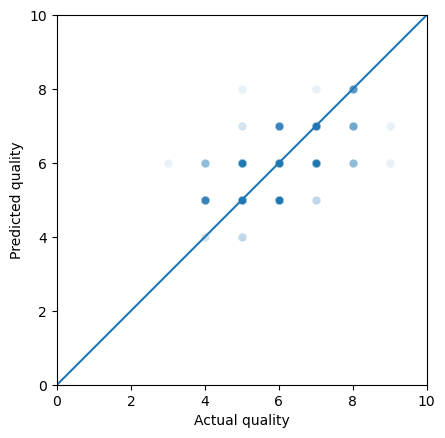

In [36]:
y_prediction = model.predict(X_test)
sb.scatterplot(x=y_test, y=y_prediction, alpha=0.1)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.plot([0, 10], [0, 10])
plt.xlabel("Actual quality")
plt.ylabel("Predicted quality")